In [ ]:
from IPython.display import HTML
from IPython.display import display
baseCodeHide="""
<style>
.button {
    background-color: #008CBA;;
    border: none;
    color: white;
    padding: 8px 22px;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    font-size: 16px;
    margin: 4px 2px;
    cursor: pointer;
}
</style>
 <script>
   // Assume 3 input cells. Manage from here.
   var divTag0 = document.getElementsByClassName("input")[0]
   var displaySetting0 = divTag0.style.display;
   // Default display - set to 'none'.  To hide, set to 'block'.
   // divTag0.style.display = 'block';
   divTag0.style.display = 'none';
   
   var divTag1 = document.getElementsByClassName("input")[1]
   var displaySetting1 = divTag1.style.display;
   // Default display - set to 'none'.  To hide, set to 'block'.
      divTag1.style.display = 'block';
   //divTag1.style.display = 'none';
   
   var divTag2 = document.getElementsByClassName("input")[2]
   var displaySetting2 = divTag2.style.display;
   // Default display - set to 'none'.  To hide, set to 'none'.
   divTag2.style.display = 'block';
   //divTag2.style.display = 'none';
 
    function toggleInput(i) { 
      var divTag = document.getElementsByClassName("input")[i]
      var displaySetting = divTag.style.display;
     
      if (displaySetting == 'block') { 
         divTag.style.display = 'none';
       }
      else { 
         divTag.style.display = 'block';
       } 
  }  
  </script>
  <!-- <button onclick="javascript:toggleInput(0)" class="button">Show Code</button> -->
"""
h=HTML(baseCodeHide)


display(h)

![ll](https://images.unsplash.com/photo-1519662596600-f508233aaf3c?ixlib=rb-1.2.1)
<center>By Raden Masputra, at Unsplash</center>

# Mission

Creating a model whereby dementia can be predicted for any person, enabling early intervention. The long-term goal is to be able to integrate this model into any digital healthcare platform in the world that deals with mental health, or health in a holistic sense.

# Dataset description


> The [Open Access Series of Imaging Studies (OASIS)](http://) is a project aimed at making MRI data sets of the brain freely available to the scientific community. By compiling and freely distributing MRI data sets, we hope to facilitate future discoveries in basic and clinical neuroscience. OASIS is made available by the Washington University Alzheimer’s Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)( at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University School of Medicine, and the Biomedical Informatics Research Network (BIRN).
> 
> 
> **Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults:** This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD). Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a subsequent visit within 90 days of their initial session.
> 
> **Longitudinal MRI Data in Nondemented and Demented Older Adults:** This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

### Columns

The datasets consist of the following columns. Some are only in one of the two. 

**Indexing**

* ID / Subject ID
* MRI ID - An ID of the particular MRI scan. (Longitudinal only) 
* Visit - The ordinality of the hospital visit: 1st, 2nd or 3rd. (Longitudinal only) 

**Demographics**

* M/F - Gender
* Hand - Handedness 
* Age - Age in years
* Educ - Years of education
* SES - Socioeconomic status, as assessed by the Hollingshead Index of Social Position. Categories 1-5, with 1 being dirt poor and 5 someone with a couple Teslas.

**Clinical ratings**

* MMSE - Mini Mental State Examination score (from 0 to 30, i.e., worst to best).
* CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild, 1 = mild AD, 2 = moderate) (Cross-sectional only)
* Group - The category of the subject, considering his/her change during the longitudinal study: Demented, Non-demented, or Converted (i.e., gained dementia during the study). (Longitudinal only) 

**Physical measurements** 

* eTIV - Estimated total intracranial volume, mm3
* nWBV - Normalized whole-brain volume. Expressed as a percent of all voxels in the atlas-masked image that are labeled as white or gray matter by the automated tissue segmentation process
* ASF - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)
* MR Delay - The time that the MRI scan took.

The above descriptions of nWBV and ASF are copied from 
*Shukla, Anupam Prof, and Ritu Tiwari. Discrete Problems in Nature Inspired Algorithms. p. 227, CRC Press, 2017.*

### Columns to be trivially dropped

The Subject ID will be needed to merge the datasets. But afterwards, besides the three indexing columns, the following two will be dropped from the dataset:

* *Hand:* Yields no info, as everyone here is right-handed.

* *MR Delay:* The time a scan takes has nothing to do with the person being scanned. 


# Setup 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc


# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches
from scipy import stats
from scipy.stats import skew

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
pd.set_option('max_columns', 100)

py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import os,random, math, psutil, pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import KFold, StratifiedKFold
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

Importing the data and splitting it into the training and validation sets.

In [ ]:
long_df = pd.read_csv("/kaggle/input/mri-and-alzheimers/oasis_longitudinal.csv")
cross_df = pd.read_csv("/kaggle/input/mri-and-alzheimers/oasis_cross-sectional.csv")

def split(df, test_size=0.2):
    #df = df.sample(frac=1, random_state=6) # Shuffle the df.
    split_index = int(len(df)*test_size)
    return df[:-split_index], df[-split_index:]

long_train, long_val = split(long_df)
cross_train, cross_val = split(cross_df)

Making a binary feature called *demented*, showing whether the person has any form of dementia. Every person in the Cross-sectional who has a CDR above 0, and everyone in the Longitudinal who belongs to groups Demented and Converted, will get *demented = 1*.

In [ ]:
from math import isnan

# Preserving the NaNs so they can be imputed later.
def binarize_cdr(x):
    if isnan(x):
        return x
    else:
        return 1 if x > 0 else 0

# There are no NaNs in the Group column.
def binarize_group(x):
    return 1 if x != 'Nondemented' else 0

long_train['demented'] = long_train['Group'].apply(binarize_group)
cross_train['demented'] = cross_train['CDR'].apply(binarize_cdr)
long_val['demented'] = long_val['Group'].apply(binarize_group)
cross_val['demented'] = cross_val['CDR'].apply(binarize_cdr)

Combining the Cross-sectional and the Longitudinal. 

In [ ]:
def combine_dfs(long, cross):
    
    # Renaming the education column to match between the two dataframes.
    long = long.rename(columns={'EDUC': 'Educ'})

    # Combining the rows of each person in the Longitudinal into a single one, taking the mean of each feature's values.
    mean_long = long.groupby('Subject ID').mean()

    # Adding the columns of strings back, as they were dropped by the mean() 
    mean_long = pd.merge(mean_long, long[['Subject ID', 'M/F', 'Group']].drop_duplicates(), on='Subject ID', how='right').reset_index(drop=True)

    # Then concatenating the new condensed dataframe with the Cross-sectional.
    total = pd.concat((cross, mean_long)).reset_index(drop=True)
    
    return total, mean_long

total_train, long_train = combine_dfs(long_train, cross_train)
total_val, _ = combine_dfs(long_val, cross_val)

# Dropping from the validation set the rows where the demented feature is NaN, as they cannot be used for validation.
total_val = total_val[~np.isnan(total_val['demented'])]

Dropping the redundant columns:

In [ ]:
total_train = total_train.drop(['Visit', 'Hand', 'MR Delay', 'Delay', 'Subject ID', 'ID'], axis=1)
total_val = total_val.drop(['Visit', 'Hand', 'MR Delay', 'Delay', 'Subject ID', 'ID'], axis=1)

# Exploration

I will use only the training sets here in order to prevent leaking info from the testing sets into the model and thereby biasing it. Indeed, exploration, when conducted so as to unearth insights for modeling, is already part of the the model's 'training'.

### Age distribution

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.distplot(cross_train[['Age']], hist=False, label='Cross')
sns.distplot(long_train['Age'], hist=False, label='Long', color='g')
g = sns.distplot(total_train['Age'], hist=False, rug=True, kde_kws=dict(linewidth=3), label='Total')
_ = g.set_title('Distribution of ages in the two datasets and their combination.')

The standard deviation of ages in the longitudinal is pretty small; an elderly population was intentionally chosen for that study. From experience of living in society we can say that the expected probability of having dementia is far greater for old people than for young and middle-aged ones, and hence the longitudinal study is very valuable for increasing the accuracy of the eventual model. However, it would advisable to have more data of the boundary region between youth and oldness (that is, the middle ages); there is an unseemly trough at the 30 - 50 range.

### CDR and dementia state against various features

**Age**

Lets split the males and females in order to be able to compare them better.

In [ ]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Cross-sectional')
sns.catplot(x='CDR', y='Age', data=cross_train, kind='swarm', split=True, hue='M/F', ax=ax)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Longitudinal')
sns.catplot(x='Group', y='Age', data=long_train, kind='swarm', split=True, hue='M/F', ax=ax);
plt.close(2)
plt.close(3)

fig = plt.figure(figsize=(8,6))
g = sns.catplot(x='demented', y='Age', data=total_train, kind='violin', split=True, hue='M/F')
g.ax.set_title('Total data')

**Cross-sectional**

* By far the most of the test subjects had no dementia at all. 

* Everyone who had even the slightest indications of dementia was over 60 years old.

* There does not seem to be any relationship between gender and CDR. 

* There are no cases of severe dementia, i.e., CDR = 3.


**Longitudinal**

Note that the Nondemented and Converted groups are dominated by females, while the Demented group is dominated by males. Could this be an indication of women's having more mentally stimulating lifestyles, or at least having had decades ago, when these old people were young? 

In any case, the scarcity of males in the Converted group is probably caused by the tendency of the males' dementia to have already begun by the time the study was conducted.

**Total**

There is no significant difference between the genders in the age of demented people: the condition tends to begin creeping into people's brains at the same age (about 55).

**Mini mental state examination**

In [ ]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Cross-sectional')
sns.catplot(x='CDR', y='MMSE', data=cross_train, kind='swarm', hue='M/F', split=True, ax=ax)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Longitudinal')
sns.catplot(x='Group', y='MMSE', data=long_train, kind='swarm', hue='M/F', split=True, ax=ax);
plt.close(2)
plt.close(3)

fig = plt.figure(figsize=(8,6))
g = sns.catplot(x='demented', y='MMSE', data=total_train, kind='violin', split=True, hue='M/F')
g.ax.set_title('Total data')

A considerable amount of demented people got scores in the same range (26 - 30) as the non-demented ones in both the cross-sectional and longitudinal. As such, it is no wonder that the majority of the converted people too lie in this range. It seems that this test does not pick up dementia as well as the one used for the CDR.

In the cross-sectional, the majority of people with any dementia (ie. non-zero CDR) are males. On the other hand, in the longitudinal, there is no gender bias for existing dementia, though the majority of the people who were developed dementia after the first test were female.

**Socioeconomic status**



In [ ]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Cross-sectional')
sns.catplot(x='CDR', y='SES', data=cross_train, kind='swarm', split=False, hue='M/F', ax=ax)
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Longitudinal')
sns.catplot(x='Group', y='SES', data=long_train, kind='swarm', split=False, hue='M/F', ax=ax);
plt.close(2)
plt.close(3)

fig = plt.figure(figsize=(8,6))
g = sns.catplot(x='demented', y='SES', data=total_train, kind='violin', split=True, hue='M/F')
g.ax.set_title('Total data')

The most striking thing is that in the cross-sectional study, the people with the highest socioeconomic status are all males, while in the longitudinal they are all females. Otherwise the socioeconomic status does not seem to have a correlation with dementia.

Note also the clear median of 2 for non-demented females, and the median of 3 for demented. It is surprising that people of higher socioeconomic status would have a higher probability of developing dementia, since they tend to have engage more in mentally stimulating activities (e.g., reading literature). 

**Years of education**

In [ ]:
fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Cross-sectional')
sns.catplot(x='CDR', y='Educ', data=cross_train, kind='violin', ax=ax)#, split=True, hue='M/F')
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Longitudinal')
sns.catplot(x='Group', y='Educ', data=long_train, kind='violin', ax=ax, split=True, hue='M/F')
# These are needed to suppress the extra plots that seaborn tries to create.
plt.close(2)
plt.close(3)

fig = plt.figure(figsize=(8,6))
g = sns.catplot(x='demented', y='Educ', data=total_train, kind='violin', split=True, hue='M/F')
g.ax.set_title('Total data')

As is to be expected, there seems to be a slight negative relationship between dementia and years of education. In the Cross-sectional, this is visible as the shifting of the bulk of the distributions downwards from CDR = 0 to 0.5 and 1, and of course blatantly in the great swath of people near 0 years in the CDR = 2 group. However, looking at the Longitudinal and the Total, even though the demented distribution is slightly lower than the non-demented in its head, tail and median, the overlap between the two categories is nevertheless too significant to be able to assert that demented people tend to have shorter educations than non-demented.

Looking at the total data, note the great median at around 12 years for demented females, which contrasts with the more even distribution of the demented males. (This is mostly from the equivalent peak in the Longitudinal's Demented group). It is difficult to conceive of a reason for this. One hypothesis is that women with barely any education tend to (or tended a few decades ago) to accept the jobs of housemaking and raising children more readily than more educated ones. However, it is not intuitively obvious that such activities would less mentally stimulating than doing an 'actual' job. In fact, the empathetic and linguistic capabilities trained during interactions with children seem to me more stimulating than many jobs.

### Volumes

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.2)
#ax = fig.add_subplot(1, 2, 1)
#_ = sns.distplot(total_train['eTIV']).set_title('eTIV distribution in the whole training data.')
#ax = fig.add_subplot(1, 2, 2)

for i, x in enumerate(['eTIV', 'nWBV', 'ASF']):
    ax = fig.add_subplot(2, 2, i+1)
    sns.distplot(cross_train[x], hist=False, label='Cross', ax=ax)
    sns.distplot(long_train[x], hist=False, label='Long', color='g', ax=ax)
    g = sns.distplot(total_train[x], hist=False, rug=True, kde_kws=dict(linewidth=3), label='Total', ax=ax)
    _ = g.set_title('Distribution of {} in the two datasets and their combination.'.format(x))

# These are needed to suppress the extra plots that seaborn tries to create.
plt.close(2)
plt.close(3)

#fig = plt.figure(figsize=(8,6))
#_ = sns.distplot(total_train['ASF']).set_title('Atlas scaling factor in the whole training data.')

Dodgy distributions! (Except for the comely nWBV Longitudinal distribution). Natural scale attributes (that is, related to size) are usually normally distributed (or, more accurately, lognormally), but none of these except for the green nWBV curve seem to be so. Since the curves of the Cross-sectional and Longitudinal are almost equivalent for eTIV, their unruly shape must be caused by the measurement methodology. As for the ASF, it is no wonder that the distribution looks like that of eTIV, being derived from it.

# Feature selection

In [ ]:
# Plot a correlation heatmap with all the dataset's features.
plt.figure(figsize=(14, 8))
corr = total_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='bwr')

It is time to choose the features to use in the model.

* Looking at the *demented* row and column, it has a great or decent correlation with everything except ASF and eTIV, so they will be dropped. 
* Since CDR was used to engineer the demented feature, it will be dropped.
* The correlation of nWBV with age is so significant that one of them should perhaps be dropped. Which one? Even though the magnitude of the nWBV correlation is 0.11 higher than the Age one, I will go for the latter in order to keep the model more practical. After all, it is far easier to find out a person's age than to conduct a brain scan. The model could therefore be used  digitally before any hospital visit to find out the need to for such a visit. However, lets see the effect on the model's accuracy of removing each one separately.


In [ ]:
features_to_drop = ['Group', 'CDR', 'ASF', 'eTIV', 'nWBV']
total_train, total_val = total_train.drop(features_to_drop, axis=1), total_val.drop(features_to_drop, axis=1) 

Encoding the M/F column. In other words, mapping the M and F strings into 0 and 1 respectively so that it could be used by  ML models.

In [ ]:
total_train['M/F'], total_val['M/F'] = pd.get_dummies(total_train['M/F']), pd.get_dummies(total_val['M/F'])

# Missing data

There are various ways to handle missing data. I will try five methods, four of which are imputations (that is, assigning values by inference) and the fifth is simply dropping the NaN rows.

In [ ]:
import missingno as msno
msno.matrix(total_train)

###############################
# Can also use describe(data)
###############################

Unfortunately a massive amount is missing.

### Method 1: Imputing the most frequent value

In [ ]:
h1_train, h1_val = total_train.copy(), total_val.copy()


from sklearn_pandas import CategoricalImputer
ci = CategoricalImputer().fit(h1_train.to_numpy())
h1_train.loc[:,:] = ci.transform(h1_train.to_numpy())
h1_val.loc[:,:] = ci.transform(h1_val.to_numpy()) 

#i2_train.loc[:,:] = CategoricalImputer().fit(i2_train.to_numpy()).transform(i2_train.to_numpy())
#i2_val.loc[:,:] = CategoricalImputer().fit(i2_val.to_numpy()).transform(i2_val.to_numpy()) 

### Method 2: Imputing by linear regression; ordering and splitting the target feature.

While linear regression is good for the continuous features, it will not work well for the target feature (*demented*), as it is binary. It will have to be handled differently.

In [ ]:
h2_train, h2_val = total_train.copy(), total_val.copy()


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0).fit(h2_train)
h2_train.loc[:,:] = imp.transform(h2_train)
h2_val.loc[:,:] = imp.transform(h2_val)

Lets check out the values of the target feature.

In [ ]:
h2_train['demented'].unique()

As expected, none of of the imputed values are above 0.5.

A different threshold is therefore needed to map the values into 0 and 1. I could of course simply use the point equidistant from the min and max of the values. However, there is no reason to assume that these values can be interpreted as probabilities. So I will instead not use a threshold at all, but rather assume that the expected value of the probability of dementia is the same in this NaN-subsample as in the non-NaN one. I will then find out the ratio *X* of demented people in the non-Nan subsample of the Cross-validated set (I am excluding the Longitudinal from this ratio because its *demented* column contains no missing data), order the imputed values ascending, and map the last *XN* values to 1, the rest to 0, where *N* is the amount of values.

In [ ]:
def binarize_imputed(total, cross):
    # Find the ratio of people in the training set (excluding the ones with NaNs) that do not have dementia.
    nonnan_demented = cross['demented'].dropna()
    demented_ratio = nonnan_demented.value_counts()[1] / len(nonnan_demented)

    # Getting the imputed values of the target column and ordering them ascending.
    sorted_imputed = cross.loc[cross['demented'].isna(), 'demented'].sort_values()
    to_zeros, to_ones = split(sorted_imputed, demented_ratio)

    # Conducting the mapping.
    total.loc[to_zeros.index, 'demented'] = 0
    total.loc[to_ones.index, 'demented'] = 1
    return total['demented']

h2_train['demented'] = binarize_imputed(h2_train, cross_train)

### Method 3: Imputing by linear regression; using logistic regression for the target feature.

In [ ]:
# Copying the linear regression-imputed data from the previous method.
h3_train, h3_val = h2_train.copy(), h2_val.copy()


nan_rows = h3_train.loc[total_train['demented'].isna()]
non_nan_rows = h3_train.loc[~total_train['demented'].isna()]

y, X = non_nan_rows['demented'], non_nan_rows.drop('demented', axis=1)
X = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)

param_grid = [ {   
                'penalty': ['l1', 'l2'], 
                'solver': ['liblinear', 'saga'], 
                'fit_intercept': [True, False],
                'C': np.logspace(0, 4, 20)
             } ]
best_tree = GridSearchCV(LogisticRegression(), param_grid, cv=5)
h3_train.loc[nan_rows.index, 'demented'] = best_tree.fit(X, y).predict(nan_rows.drop('demented', axis=1))

### Method 4: Imputing by decision tree

Decision trees can handle both continuous and categorical data, so the target will not be a problem this time.

In [ ]:
h4_train, h4_val = h2_train.copy(), h2_val.copy()


param_grid = [ {
                'max_depth': [2,3,4,5,6,7,8,9,10,11,12], 
                'criterion': ['entropy', 'gini'],
                'splitter': ['best', 'random'],
             } ]
best_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
h4_train.loc[nan_rows.index, 'demented'] = best_tree.fit(X, y).predict(nan_rows.drop('demented', axis=1))

### Method 5: Dropping the NaN rows 

Note that they are dropped from training set, but not from the validation set. Method 1 will instead be used for the latter. The reasons for this are the following:
1. The validation set is already distressingly small; do not dare make the validation precision even poorer.
2. There is no guarantee that there would be no missing data in real applications of the eventual model.

In [ ]:
h5_train = total_train.dropna()
h5_val = h1_val.copy()

# Modeling

### Logreg

Separating the features from the targets, and scaling them. [Here](https://stats.stackexchange.com/a/112152/49044) you can view a great explanation for the need for scaling (and the vanity of scaling the target).

In [ ]:
def Xy(train, val):
    y_train, y_val = train['demented'], val['demented']
    X_train, X_val = train.drop('demented', axis=1), val.drop('demented', axis=1)
    
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True).fit(train.drop('demented', axis=1))
    return y_train, y_val, scaler.transform(X_train), scaler.transform(X_val)

I will use logistic regression, the most natural model for binary classification. And I will wrap it in a bag, i.e., use BaggingClassifier with an ensemble of LogisticRegressions. Bagging is the splitting of the training data into folds, and training of a separate model for each. A prediction is then made by predicting with each of these models, and averaging their results. This is a great way to raise regularization: the averaging lessens the effect of outliers, as only one of the folds will include each outlier (if the folds are sampled without replacement, as I do below).

Now, which scoring function is best in this case? Certainly not accuracy, even though this dataset is not unbalanced (as the 0/1 ratio is about 40/60). Accuracy should never be used in data science, [as it is an improper scoring rule](https://stats.stackexchange.com/a/312787/49044) (in fact, it is not a scoring rule at all), discontinuous at the threshold. Of the X widely used evaluation metrics for binary classification ([here](https://neptune.ml/blog/evaluation-metrics-binary-classification) is a great summary) there are two candidates for this project:

1. Logloss: the natural function for logistic regression.
2. Recall (i.e., true positive rate): how many of the true positives are classified as positive. This is calculated by

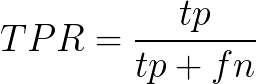

where *tp* is the amount of true positives and *fn* is the amount of false negatives. In clinical contexts, the metrics of the confusion matrix, including recall, are of primary importance ([but have to be handled with care due to cognitive bias](https://www.fharrell.com/post/mlconfusion/)) because of the high risk associated with erroneous decisions. This project's aim is to create a dementia detection model, to be integrated into any digital healthcare platform. Although dementia (or more specifically, its most common cause, Alzheimer's) is near the low end of the scale of disease severity, it is nevertheless critical to get potentially affected people into treatment as soon as possible, given the great decline in quality of life (for the person him/herself as well as for family members). As such, it would be better to erroneously send someone on a clinical visit than to fail to notice a budding dementia. I therefore choose the Recall as the metric, rather than the elegant logloss.

In [ ]:
def logreg(X, y, bag=True):
    
    # Create a hyperparameter space. There are two dictionaries because 
    # newton-cg, lbfgs and sag cannot use l1.
    param_grid = [
                      {
                           'penalty': ['l1', 'l2'], 
                           'solver': ['liblinear', 'saga'], 
                           'fit_intercept': [True, False],
                           'C': np.logspace(0, 4, 20)
                    },{
                           
                           'penalty': ['l2'], 
                           'solver': ['newton-cg', 'lbfgs', 'sag'], 
                           'fit_intercept': [True, False],
                           'C': np.logspace(0, 4, 20)
                      },
                 ]
    
    # Adding a prefix to the dictionary keys if bagging is used,
    # as BaggingClassifier needs it to distinguish its base estimator's
    # parameters from its own.
    if bag: param_grid = [
                            {'base_estimator__' + k: v for k, v in param_grid[0].items()},
                            {'base_estimator__' + k: v for k, v in param_grid[1].items()}
                         ]
    
    # The two alternative models.
    lr = LogisticRegression()
    bc = BaggingClassifier(base_estimator=lr)

    # Use stratified instead of shuffle split so that each split would contain a sufficient amount of each category.
    cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    # Conduct the search.
    best_model = GridSearchCV(estimator = (bc if bag else lr), 
                              param_grid = param_grid, 
                              cv = cv, 
                              scoring = 'recall',#'neg_log_loss', 
                              n_jobs = -1
                             ).fit(X,y)
    
    # Outputing the optimal point in the hyperparameter space.
    keys = param_grid[0].keys()
    grid_optimum = [best_model.best_estimator_.get_params()[p] for p in keys]
    for p, x in zip(keys, grid_optimum):
        print('Best {}: {}'.format(p,x))

    return best_model

Validating the model:

In [ ]:
imputations = [(h1_train, h1_val), (h2_train, h2_val), (h3_train, h3_val), (h4_train, h4_val), (h5_train, h5_val)]

def validate_logreg(bag):
    for i, (train, val) in enumerate(imputations):
        print("Handling method {}:".format(i+1))
        y_train, y_val, X_train, X_val = Xy(train, val)
        model = logreg(X_train, y_train, bag=bag)
        pred = model.predict(X_val)
        print(classification_report(y_val, pred))
        
validate_logreg(bag=False)

Alas, looking at the Recall scores (the averages between the 0 and 1 values), none of the handling methods could beat the most popular one, imputation by most frequent value. Note also that for some reason the scores of the two worst ones, the logistic regression and decision tree (methods 3 and 4) are equivalent.

The Recall of 0.9 for negatuves (that is, not being demented) is decently high. However, our primary aim, the maximization of Recall for positives, has not succeeded, its being only 0.74. Lets see whether it can be raised by bagging.

### Bagged logreg

In [ ]:
validate_logreg(bag=True)

No, the only thing that bagging achieved was the slight lowering of Recall for method 3. It may well be that this dataset is  too small for bagging to be beneficial.

### Boosted logreg

Due to AdaBoost's excessive time, I use only two splits in the grid search, and restricted some other parameters too.

In [ ]:
def boosted_logreg(X, y):
    
    # Create a hyperparameter space. There are two dictionaries because 
    # newton-cg, lbfgs and sag cannot use l1.
    
    # The base estimator's subspace of the parameter space.
    logreg_param_grid = [
                              {
                                   'penalty': ['l1', 'l2'], 
                                   'solver': ['liblinear', 'saga'], 
                                   'fit_intercept': [True, False],
                                   'C': np.logspace(0, 4, 10)
                            },{

                                   'penalty': ['l2'], 
                                   'solver': ['newton-cg', 'lbfgs', 'sag'], 
                                   'fit_intercept': [True, False],
                                   'C': np.logspace(0, 4, 10)
                              },
                        ]
    
    # The booster's subspace of the parameter space.
    adaboost_param_grid = { 
                              'learning_rate': [0.1, 0.5, 1],
                              'n_estimators': np.arange(100, 200, 15)
                          }
    
    
    # Add a prefix to the logreg_param_grid keys,
    # as AdaBoostClassifier needs it to distinguish its base estimator's
    # parameters from its own.
    param_grid = [
                    {'base_estimator__' + k: v for k, v in logreg_param_grid[0].items()},#.update(adaboost_param_grid),
                    {'base_estimator__' + k: v for k, v in logreg_param_grid[1].items()}#.update(adaboost_param_grid)
                 ]
    
    # Combine the above two subspaces. Cannot use list comprehension with update() as it modifies in place.
    param_grid[0].update(adaboost_param_grid), param_grid[1].update(adaboost_param_grid)
    
    # The model.
    ab = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=LogisticRegression())
                            #learning_rate=1.0, 
                            #n_estimators=50,)
                            #random_state=None),

    # Use stratified instead of shuffle split so that each split would contain a sufficient amount of each category.
    cv = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
    
    # Conduct the search.
    best_model = GridSearchCV(estimator = ab, 
                              param_grid = param_grid, 
                              cv = cv, 
                              scoring = 'recall',#'neg_log_loss', 
                              n_jobs = -1,
                              verbose = -1,
                             ).fit(X,y)
    
    # Outputing the optimal point in the hyperparameter space.
    keys = param_grid[0].keys()
    grid_optimum = [best_model.best_estimator_.get_params()[p] for p in keys]
    for p, x in zip(keys, grid_optimum):
        print('Best {}: {}'.format(p,x))

    return best_model

In [ ]:
imputations = [(h1_train, h1_val), (h2_train, h2_val), (h3_train, h3_val), (h4_train, h4_val), (h5_train, h5_val)]

def validate_boosted():
    for i, (train, val) in enumerate(imputations):
        print("Handling method {}:".format(i+1))
        y_train, y_val, X_train, X_val = Xy(train, val)
        model = boosted_logreg(X_train, y_train)
        pred = model.predict(X_val)
        print(classification_report(y_val, pred))

validate_boosted()

Alas, AdaBoostClassifier is no better than BaggingClassifier. I hypothesize the reason to be the dataset's smallness, so that no model can get a good grasp on the reality of the problem space in order to push down the bias to a decent level.

It is strange that for Method 1, the recall and precision of the negative results (i.e., 0) is 0. For some reason the model ascribes positive to all the people. It may well be that since Method 1 imputes only 0s (as the non-demented are more numerous in the data), the dataset becomes too unbalanced for AdaBoost to handle. This should be investigated.

### TODO: try Decision Tree instead

# Process insights

* Simply imputing the mean of most frequent value is superior to replacing categorical data with some fancy function.
* Bagging and boosting offer no benefit with small datasets (a few hundred elements).
* Beware: it seems that for unbalanced data, AdaBoost tends to maximize recall (and other metrics too?) in a [non-continuous way](https://stats.stackexchange.com/a/312787/49044).

Note that as these are derived only from this project, they may be biased. I --- and you too if the above does not correlate with your experience, whether negatively or positively --- need to work on many more projects in order to regularize these mental models.

In [ ]:
from IPython.display import HTML
from IPython.display import display

cellNum=2
cellDisp='none'  # Other option is 'block'
cell="""
<script>
   var divTag = document.getElementsByClassName("input")[%s]
   var displaySetting = divTag.style.display;
   // Default display - set to 'none'.  To hide, set to 'block'.
   // divTag.style.display = 'block';
   divTag.style.display = '%s';
<script>
<!-- <button onclick="javascript:toggleInput(%s)" class="button">Toggle Code</button> -->
""" % (cellNum,'none',cellNum)
h=HTML(cell)
display(h)